In [1]:
import itertools
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import time
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
def generate_hidden_layer_sizes(start=50, stop=200, step=50, max_layers=3):
    sizes = range(start, stop + 1, step)
    return [size for num_layers in range(1, max_layers + 1) for size in itertools.product(sizes, repeat=num_layers)]


hidden_layer_sizes = generate_hidden_layer_sizes(start=50, stop=150, step=50, max_layers=2)
activation_functions = ['relu', 'tanh']
solvers = ['adam', 'sgd']
learning_rates = ['constant', 'adaptive']

# 1 sekundowe pliki

## 13 cech

In [2]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_13_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_13_mfcc_features_with_labels_1sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
results_ann  = []

for hidden_layers in hidden_layer_sizes:
    for activation in activation_functions:
        for learning_rate in learning_rates:
            for solver in solvers:
                try:
                    clf = MLPClassifier(
                        hidden_layer_sizes=hidden_layers,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate,
                        max_iter=1000,
                        random_state=42
                    )
                    
                    start_time = time.time()
                    clf.fit(X_train, y_train)
                    training_time = time.time() - start_time
                    
                    y_pred = clf.predict(X_test)

                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, zero_division=0)
                    recall = recall_score(y_test, y_pred, zero_division=0)
                    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                    
                    results_ann.append({
                        "Hidden Layers": hidden_layers,
                        "Activation": activation,
                        "Solver": solver,
                        "Learning Rate": learning_rate,
                        "Training Time (s)": training_time,
                        "Accuracy": accuracy,
                        "Precision": precision,
                        "Recall": recall,
                        "F1 Score": f1
                    })
                
                except Exception as e:
                    print(f"Error with configuration hidden_layers={hidden_layers}, activation={activation}, solver={solver}, learning_rate={learning_rate}: {e}")


metrics_ann = ["Accuracy", "F1 Score", "Recall", "Precision"]
best_ann_models = {metric: max(results_ann, key=lambda x: x[metric]) for metric in metrics_ann}
best_ann_models["Training Time"] = min(results_ann, key=lambda x: x["Training Time (s)"])


all_models_ann_table = [
    [res["Hidden Layers"], res["Activation"], res["Solver"], res["Learning Rate"], res["Accuracy"], 
     res["Precision"], res["Recall"], res["F1 Score"], res["Training Time (s)"]]
    for res in results_ann
]

best_models_ann_table = [
    [metric, 
     best_ann_models[metric]["Hidden Layers"], 
     best_ann_models[metric]["Activation"], 
     best_ann_models[metric]["Solver"], 
     best_ann_models[metric]["Learning Rate"], 
     best_ann_models[metric]["Accuracy"], 
     best_ann_models[metric]["Precision"], 
     best_ann_models[metric]["Recall"], 
     best_ann_models[metric]["F1 Score"], 
     best_ann_models[metric]["Training Time (s)"]]
    for metric in metrics_ann + ["Training Time"]
]


print("\nBest Models for Each Metric (ANN):")
print(tabulate(best_models_ann_table, headers=[
    "Metric", "Hidden Layers", "Activation", "Solver", "Learning Rate", "Accuracy", 
    "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))



Best Models for Each Metric (ANN):
╒═══════════════╤═════════════════╤══════════════╤══════════╤═════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Metric        │ Hidden Layers   │ Activation   │ Solver   │ Learning Rate   │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═══════════════╪═════════════════╪══════════════╪══════════╪═════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ Accuracy      │ (150, 150)      │ relu         │ adam     │ constant        │   0.962349 │    0.962542 │ 0.962349 │   0.962432 │           105.597   │
├───────────────┼─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ F1 Score      │ (150, 150)      │ relu         │ adam     │ constant        │   0.962349 │    0.962542 │ 0.962349 │   0.962432 │           105.597   │
├───────────────┼─────────────────┼───────────

ANN: 
 Dokładność (Accuracy): 0.9563 
 Precyzja (Precision): 0.9562 
 Recall: 0.9563 
 F1 score: 0.9562 
 Czas treningu: 50.3641 sekund

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1660
           1       0.94      0.92      0.93      1660
           2       0.94      0.93      0.94      1660
           3       0.99      0.99      0.99      1660

    accuracy                           0.96      6640
   macro avg       0.96      0.96      0.96      6640
weighted avg       0.96      0.96      0.96      6640



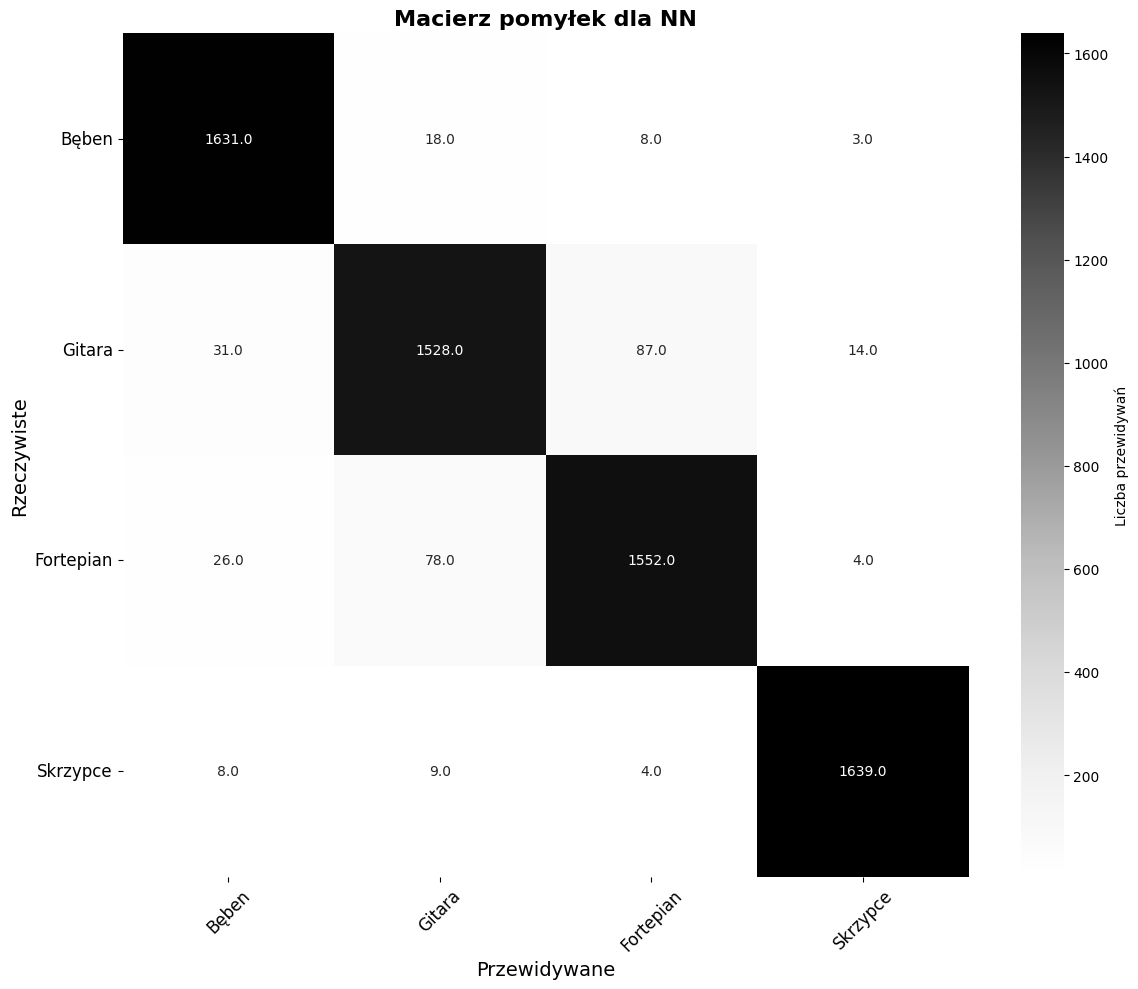

In [6]:
model = clf = MLPClassifier(
                        hidden_layer_sizes = (150, 150),
                        activation= 'relu',
                        solver='adam',
                        learning_rate= 'constant',
                        max_iter=1000,
                        random_state=42 )


start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
                    
unique_labels = y_test.unique()                   
y_pred = clf.predict(X_test)
                    
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')              

print("ANN: ")

print(f" Dokładność (Accuracy): {accuracy:.4f} ")
print(f" Precyzja (Precision): {precision:.4f} ")
print(f" Recall: {recall:.4f} ")
print(f" F1 score: {f1:.4f} ")
print(f" Czas treningu: {training_time:.4f} sekund")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(label) for label in sorted(unique_labels)]))

label_mapping = {
    0: "Bęben",
    1: "Gitara",
    2: "Fortepian",
    3: "Skrzypce"
}

sorted_labels = np.sort(unique_labels)
mapped_labels = [label_mapping[label] for label in sorted_labels]
conf_matrix = confusion_matrix(y_test, y_pred, labels=sorted_labels)


plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Greys", 
            xticklabels=mapped_labels, yticklabels=mapped_labels, cbar_kws={'label': 'Liczba przewidywań'})

plt.xlabel("Przewidywane", fontsize=14)
plt.ylabel("Rzeczywiste", fontsize=14)
plt.title("Macierz pomyłek dla NN", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


In [4]:
print("All Models (ANN):")
print(tabulate(all_models_ann_table, headers=[
    "Hidden Layers", "Activation", "Solver", "Learning Rate", "Accuracy", 
    "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

All Models (ANN):
╒═════════════════╤══════════════╤══════════╤═════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Hidden Layers   │ Activation   │ Solver   │ Learning Rate   │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═════════════════╪══════════════╪══════════╪═════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ (50,)           │ relu         │ adam     │ constant        │   0.918223 │    0.917722 │ 0.918223 │   0.917822 │            11.11    │
├─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ (50,)           │ relu         │ sgd      │ constant        │   0.900151 │    0.899162 │ 0.900151 │   0.899204 │            11.219   │
├─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ (50,)           │ rel

## 30 cech

In [5]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_30_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_30_mfcc_features_with_labels_1sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
results_ann  = []

for hidden_layers in hidden_layer_sizes:
    for activation in activation_functions:
        for learning_rate in learning_rates:
            for solver in solvers:
                try:
                    clf = MLPClassifier(
                        hidden_layer_sizes=hidden_layers,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate,
                        max_iter=1000,
                        random_state=42
                    )
                    
                    start_time = time.time()
                    clf.fit(X_train, y_train)
                    training_time = time.time() - start_time
                    
                    y_pred = clf.predict(X_test)

                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, zero_division=0)
                    recall = recall_score(y_test, y_pred, zero_division=0)
                    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                    
                    results_ann.append({
                        "Hidden Layers": hidden_layers,
                        "Activation": activation,
                        "Solver": solver,
                        "Learning Rate": learning_rate,
                        "Training Time (s)": training_time,
                        "Accuracy": accuracy,
                        "Precision": precision,
                        "Recall": recall,
                        "F1 Score": f1
                    })
                
                except Exception as e:
                    print(f"Error with configuration hidden_layers={hidden_layers}, activation={activation}, solver={solver}, learning_rate={learning_rate}: {e}")


metrics_ann = ["Accuracy", "F1 Score", "Recall", "Precision"]
best_ann_models = {metric: max(results_ann, key=lambda x: x[metric]) for metric in metrics_ann}
best_ann_models["Training Time"] = min(results_ann, key=lambda x: x["Training Time (s)"])


all_models_ann_table = [
    [res["Hidden Layers"], res["Activation"], res["Solver"], res["Learning Rate"], res["Accuracy"], 
     res["Precision"], res["Recall"], res["F1 Score"], res["Training Time (s)"]]
    for res in results_ann
]

best_models_ann_table = [
    [metric, 
     best_ann_models[metric]["Hidden Layers"], 
     best_ann_models[metric]["Activation"], 
     best_ann_models[metric]["Solver"], 
     best_ann_models[metric]["Learning Rate"], 
     best_ann_models[metric]["Accuracy"], 
     best_ann_models[metric]["Precision"], 
     best_ann_models[metric]["Recall"], 
     best_ann_models[metric]["F1 Score"], 
     best_ann_models[metric]["Training Time (s)"]]
    for metric in metrics_ann + ["Training Time"]
]


print("\nBest Models for Each Metric (ANN):")
print(tabulate(best_models_ann_table, headers=[
    "Metric", "Hidden Layers", "Activation", "Solver", "Learning Rate", "Accuracy", 
    "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))



Best Models for Each Metric (ANN):
╒═══════════════╤═════════════════╤══════════════╤══════════╤═════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Metric        │ Hidden Layers   │ Activation   │ Solver   │ Learning Rate   │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═══════════════╪═════════════════╪══════════════╪══════════╪═════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ Accuracy      │ (150, 150)      │ relu         │ adam     │ constant        │   0.973946 │    0.973918 │ 0.973946 │   0.973845 │            44.0494  │
├───────────────┼─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ F1 Score      │ (150, 150)      │ relu         │ adam     │ constant        │   0.973946 │    0.973918 │ 0.973946 │   0.973845 │            44.0494  │
├───────────────┼─────────────────┼───────────

In [7]:
print("All Models (ANN):")
print(tabulate(all_models_ann_table, headers=[
    "Hidden Layers", "Activation", "Solver", "Learning Rate", "Accuracy", 
    "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

All Models (ANN):
╒═════════════════╤══════════════╤══════════╤═════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Hidden Layers   │ Activation   │ Solver   │ Learning Rate   │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═════════════════╪══════════════╪══════════╪═════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ (50,)           │ relu         │ adam     │ constant        │   0.93253  │    0.934842 │ 0.93253  │   0.932759 │             7.63675 │
├─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ (50,)           │ relu         │ sgd      │ constant        │   0.904217 │    0.906875 │ 0.904217 │   0.904975 │            13.8863  │
├─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ (50,)           │ rel

## 50 cech

In [7]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_50_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_50_mfcc_features_with_labels_1sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
results_ann  = []

for hidden_layers in hidden_layer_sizes:
    for activation in activation_functions:
        for learning_rate in learning_rates:
            for solver in solvers:
                try:
                    clf = MLPClassifier(
                        hidden_layer_sizes=hidden_layers,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate,
                        max_iter=1000,
                        random_state=42
                    )
                    
                    start_time = time.time()
                    clf.fit(X_train, y_train)
                    training_time = time.time() - start_time
                    
                    y_pred = clf.predict(X_test)

                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, zero_division=0)
                    recall = recall_score(y_test, y_pred, zero_division=0)
                    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                    
                    results_ann.append({
                        "Hidden Layers": hidden_layers,
                        "Activation": activation,
                        "Solver": solver,
                        "Learning Rate": learning_rate,
                        "Training Time (s)": training_time,
                        "Accuracy": accuracy,
                        "Precision": precision,
                        "Recall": recall,
                        "F1 Score": f1
                    })
                
                except Exception as e:
                    print(f"Error with configuration hidden_layers={hidden_layers}, activation={activation}, solver={solver}, learning_rate={learning_rate}: {e}")


metrics_ann = ["Accuracy", "F1 Score", "Recall", "Precision"]
best_ann_models = {metric: max(results_ann, key=lambda x: x[metric]) for metric in metrics_ann}
best_ann_models["Training Time"] = min(results_ann, key=lambda x: x["Training Time (s)"])


all_models_ann_table = [
    [res["Hidden Layers"], res["Activation"], res["Solver"], res["Learning Rate"], res["Accuracy"], 
     res["Precision"], res["Recall"], res["F1 Score"], res["Training Time (s)"]]
    for res in results_ann
]

best_models_ann_table = [
    [metric, 
     best_ann_models[metric]["Hidden Layers"], 
     best_ann_models[metric]["Activation"], 
     best_ann_models[metric]["Solver"], 
     best_ann_models[metric]["Learning Rate"], 
     best_ann_models[metric]["Accuracy"], 
     best_ann_models[metric]["Precision"], 
     best_ann_models[metric]["Recall"], 
     best_ann_models[metric]["F1 Score"], 
     best_ann_models[metric]["Training Time (s)"]]
    for metric in metrics_ann + ["Training Time"]
]


print("\nBest Models for Each Metric (NN):")
print(tabulate(best_models_ann_table, headers=[
    "Metric", "Hidden Layers", "Activation", "Solver", "Learning Rate", "Accuracy", 
    "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))



Best Models for Each Metric (ANN):
╒═══════════════╤═════════════════╤══════════════╤══════════╤═════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Metric        │ Hidden Layers   │ Activation   │ Solver   │ Learning Rate   │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═══════════════╪═════════════════╪══════════════╪══════════╪═════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ Accuracy      │ (100, 100)      │ relu         │ adam     │ constant        │   0.980873 │    0.980885 │ 0.980873 │   0.980874 │            45.576   │
├───────────────┼─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ F1 Score      │ (100, 100)      │ relu         │ adam     │ constant        │   0.980873 │    0.980885 │ 0.980873 │   0.980874 │            45.576   │
├───────────────┼─────────────────┼───────────

In [10]:
print("All Models (ANN):")
print(tabulate(all_models_ann_table, headers=[
    "Hidden Layers", "Activation", "Solver", "Learning Rate", "Accuracy", 
    "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

All Models (ANN):
╒═════════════════╤══════════════╤══════════╤═════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Hidden Layers   │ Activation   │ Solver   │ Learning Rate   │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═════════════════╪══════════════╪══════════╪═════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ (50,)           │ relu         │ adam     │ constant        │   0.958584 │    0.958773 │ 0.958584 │   0.958648 │            14.6112  │
├─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ (50,)           │ relu         │ sgd      │ constant        │   0.910542 │    0.910676 │ 0.910542 │   0.910504 │            22.5947  │
├─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ (50,)           │ rel

# 3 sekundowe pliki

In [9]:
train_data = pd.read_csv("Sounds_3_seconds/mfcc_3_sec/train_13_mfcc_features_with_labels_3sec.csv")  
test_data = pd.read_csv("Sounds_3_seconds/mfcc_3_sec/test_13_mfcc_features_with_labels_3sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
results_ann  = []

for hidden_layers in hidden_layer_sizes:
    for activation in activation_functions:
        for learning_rate in learning_rates:
            for solver in solvers:
                try:
                    clf = MLPClassifier(
                        hidden_layer_sizes=hidden_layers,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate,
                        max_iter=1000,
                        random_state=42
                    )
                    
                    start_time = time.time()
                    clf.fit(X_train, y_train)
                    training_time = time.time() - start_time
                    
                    y_pred = clf.predict(X_test)

                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, zero_division=0)
                    recall = recall_score(y_test, y_pred, zero_division=0)
                    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                    
                    results_ann.append({
                        "Hidden Layers": hidden_layers,
                        "Activation": activation,
                        "Solver": solver,
                        "Learning Rate": learning_rate,
                        "Training Time (s)": training_time,
                        "Accuracy": accuracy,
                        "Precision": precision,
                        "Recall": recall,
                        "F1 Score": f1
                    })
                
                except Exception as e:
                    print(f"Error with configuration hidden_layers={hidden_layers}, activation={activation}, solver={solver}, learning_rate={learning_rate}: {e}")


metrics_ann = ["Accuracy", "F1 Score", "Recall", "Precision"]
best_ann_models = {metric: max(results_ann, key=lambda x: x[metric]) for metric in metrics_ann}
best_ann_models["Training Time"] = min(results_ann, key=lambda x: x["Training Time (s)"])


all_models_ann_table = [
    [res["Hidden Layers"], res["Activation"], res["Solver"], res["Learning Rate"], res["Accuracy"], 
     res["Precision"], res["Recall"], res["F1 Score"], res["Training Time (s)"]]
    for res in results_ann
]

best_models_ann_table = [
    [metric, 
     best_ann_models[metric]["Hidden Layers"], 
     best_ann_models[metric]["Activation"], 
     best_ann_models[metric]["Solver"], 
     best_ann_models[metric]["Learning Rate"], 
     best_ann_models[metric]["Accuracy"], 
     best_ann_models[metric]["Precision"], 
     best_ann_models[metric]["Recall"], 
     best_ann_models[metric]["F1 Score"], 
     best_ann_models[metric]["Training Time (s)"]]
    for metric in metrics_ann + ["Training Time"]
]


print("\nBest Models for Each Metric (ANN):")
print(tabulate(best_models_ann_table, headers=[
    "Metric", "Hidden Layers", "Activation", "Solver", "Learning Rate", "Accuracy", 
    "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))



Best Models for Each Metric (ANN):
╒═══════════════╤═════════════════╤══════════════╤══════════╤═════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Metric        │ Hidden Layers   │ Activation   │ Solver   │ Learning Rate   │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═══════════════╪═════════════════╪══════════════╪══════════╪═════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ Accuracy      │ (150, 100)      │ relu         │ adam     │ constant        │   0.956034 │    0.956586 │ 0.956034 │   0.956106 │            11.6948  │
├───────────────┼─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ F1 Score      │ (150, 100)      │ relu         │ adam     │ constant        │   0.956034 │    0.956586 │ 0.956034 │   0.956106 │            11.6948  │
├───────────────┼─────────────────┼───────────

In [13]:
print("All Models (ANN):")
print(tabulate(all_models_ann_table, headers=[
    "Hidden Layers", "Activation", "Solver", "Learning Rate", "Accuracy", 
    "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

All Models (ANN):
╒═════════════════╤══════════════╤══════════╤═════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Hidden Layers   │ Activation   │ Solver   │ Learning Rate   │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═════════════════╪══════════════╪══════════╪═════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ (50,)           │ relu         │ adam     │ constant        │   0.884483 │    0.897105 │ 0.884483 │   0.883867 │             1.7376  │
├─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ (50,)           │ relu         │ sgd      │ constant        │   0.875431 │    0.876111 │ 0.875431 │   0.873836 │             2.6728  │
├─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ (50,)           │ rel

# 5 sekundowe pliki

In [11]:
train_data = pd.read_csv("Sounds_5_seconds/mfcc_5_sec/train_13_mfcc_features_with_labels_5sec.csv")  
test_data = pd.read_csv("Sounds_5_seconds/mfcc_5_sec/test_13_mfcc_features_with_labels_5sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
results_ann  = []

for hidden_layers in hidden_layer_sizes:
    for activation in activation_functions:
        for learning_rate in learning_rates:
            for solver in solvers:
                try:
                    clf = MLPClassifier(
                        hidden_layer_sizes=hidden_layers,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate,
                        max_iter=1000,
                        random_state=42
                    )
                    
                    start_time = time.time()
                    clf.fit(X_train, y_train)
                    training_time = time.time() - start_time
                    
                    y_pred = clf.predict(X_test)

                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, zero_division=0)
                    recall = recall_score(y_test, y_pred,zero_division=0)
                    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                    
                    results_ann.append({
                        "Hidden Layers": hidden_layers,
                        "Activation": activation,
                        "Solver": solver,
                        "Learning Rate": learning_rate,
                        "Training Time (s)": training_time,
                        "Accuracy": accuracy,
                        "Precision": precision,
                        "Recall": recall,
                        "F1 Score": f1
                    })
                
                except Exception as e:
                    print(f"Error with configuration hidden_layers={hidden_layers}, activation={activation}, solver={solver}, learning_rate={learning_rate}: {e}")


metrics_ann = ["Accuracy", "F1 Score", "Recall", "Precision"]
best_ann_models = {metric: max(results_ann, key=lambda x: x[metric]) for metric in metrics_ann}
best_ann_models["Training Time"] = min(results_ann, key=lambda x: x["Training Time (s)"])


all_models_ann_table = [
    [res["Hidden Layers"], res["Activation"], res["Solver"], res["Learning Rate"], res["Accuracy"], 
     res["Precision"], res["Recall"], res["F1 Score"], res["Training Time (s)"]]
    for res in results_ann
]

best_models_ann_table = [
    [metric, 
     best_ann_models[metric]["Hidden Layers"], 
     best_ann_models[metric]["Activation"], 
     best_ann_models[metric]["Solver"], 
     best_ann_models[metric]["Learning Rate"], 
     best_ann_models[metric]["Accuracy"], 
     best_ann_models[metric]["Precision"], 
     best_ann_models[metric]["Recall"], 
     best_ann_models[metric]["F1 Score"], 
     best_ann_models[metric]["Training Time (s)"]]
    for metric in metrics_ann + ["Training Time"]
]


print("\nBest Models for Each Metric (ANN):")
print(tabulate(best_models_ann_table, headers=[
    "Metric", "Hidden Layers", "Activation", "Solver", "Learning Rate", "Accuracy", 
    "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))



Best Models for Each Metric (ANN):
╒═══════════════╤═════════════════╤══════════════╤══════════╤═════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Metric        │ Hidden Layers   │ Activation   │ Solver   │ Learning Rate   │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═══════════════╪═════════════════╪══════════════╪══════════╪═════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ Accuracy      │ (100, 150)      │ relu         │ sgd      │ adaptive        │   0.952344 │    0.952579 │ 0.952344 │   0.952435 │             15.0136 │
├───────────────┼─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ F1 Score      │ (100, 150)      │ relu         │ sgd      │ adaptive        │   0.952344 │    0.952579 │ 0.952344 │   0.952435 │             15.0136 │
├───────────────┼─────────────────┼───────────

In [16]:
print("All Models (ANN):")
print(tabulate(all_models_ann_table, headers=[
    "Hidden Layers", "Activation", "Solver", "Learning Rate", "Accuracy", 
    "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

All Models (ANN):
╒═════════════════╤══════════════╤══════════╤═════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Hidden Layers   │ Activation   │ Solver   │ Learning Rate   │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═════════════════╪══════════════╪══════════╪═════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ (50,)           │ relu         │ adam     │ constant        │   0.916406 │    0.917234 │ 0.916406 │   0.916103 │            1.10914  │
├─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ (50,)           │ relu         │ sgd      │ constant        │   0.899219 │    0.89936  │ 0.899219 │   0.898371 │            1.20407  │
├─────────────────┼──────────────┼──────────┼─────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ (50,)           │ rel